# Bertrand paradox

Bertrand's paradox shows that probability aren't well defined unless the *mechanism* or *method* that defines the random variable is clearly defined.

## Formulation of the problem

Consider an equilateral triangle inscribed in a circle. Suppose a chord of the circle is chosen at random. What is the probability that that the chord is longer than a side of the triangle?

### First approach: random endpoints

Choose two random points on the circumference of the circle and draw a chord joining them. The probability that the chord is longer than a side of the triangle is $\frac{1}{3}$.

![bertrand-1](./images/bertrand-1.png)

### Second approach: random radius

Choose a random radius of the circle and choose a random point on that radius. Construct the chord with the chosen point as its midpoint. The probability that the chord is longer than a side of the triangle is $\frac{1}{2}$.

![bertrand-2](./images/bertrand-2.png)

### Third approach: random midpoint

Choose a point a trandom within the circle. Construct the chord with the chosen point as its midpoint. Considering a cirlce of radius $\frac{r}{2}$, we can deduce that the probability that this chord is longer than a side of the inscribed triangle is $\frac{1}{4}$.

![bertrand-3](./images/bertrand-3.png)

## Experiment

Each of the methods presented above yields a different distribution of midpoints and chords. Method 1 and 2 yield non-uniform midpoint distributions and method 1 and 3 yield non-uniform chord distribution.

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
def barycentre(*points):
    n = len(points)
    return (
        sum((p[0] for p in points))/n,
        sum((p[1] for p in points))/n
    )

def build_point(angle, radius):
    return (radius * math.cos(angle), radius * math.sin(angle))

def random_angle():
    return random.uniform(0, 2*math.pi)

def random_point_on_circle():
    return build_point(random_angle(), 1)

def chord_from_midpoint(m):
    (x, y) = m
    d = math.sqrt(x**2 + y**2)
    alpha = math.atan2(y, x)
    beta = math.acos(d)
    p1 = build_point(alpha+beta, 1)
    p2 = build_point(alpha-beta, 1)
    
    return(p1, p2)

def build_dataframe(midpoints):
    def mapping(m):
        chord = chord_from_midpoint(m)
        return (chord[0][0], chord[0][1], chord[1][0], chord[1][1], m[0], m[1])
    return pd.DataFrame(list(map(mapping, midpoints)), columns=['p1x', 'p1y', 'p2x', 'p2y', 'bx', 'by'])

### First argument: random endpoints

In [3]:
def random_endpoints():
    (p1, p2) = (random_point_on_circle(), random_point_on_circle())
    b = barycentre(*[p1, p2])
    return (p1[0], p1[1], p2[0], p2[1], b[0], b[1])

arg1 = pd.DataFrame([random_endpoints() for _ in range(1000)], columns=['p1x', 'p1y', 'p2x', 'p2y', 'bx', 'by'])

### Second argument: random radius

In [4]:
def random_radius():
    return build_point(random_angle(), random.random())

arg2 = build_dataframe([random_radius() for _ in range(1000)])

### Third argument: random midpoint

In [5]:
def random_point_in_circle():
    r = 2
    while r >= 1:
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        r = math.hypot(x, y)
    return (x, y)

arg3 = build_dataframe([random_point_in_circle() for _ in range(1000)])

### Visualization

In [6]:
def draw_midpoints(df, ax):
    ax.set_xlim([-1.1,1.1])
    ax.set_ylim([-1.1,1.1])
    df.plot.scatter(x='bx', y='by', style='.', s=0.1, ax=ax, legend=False)

def draw_chords(df, ax):
    ax.set_xlim([-1.1,1.1])
    ax.set_ylim([-1.1,1.1])
    for c in df.iterrows():
        data = c[1]
        cdf = pd.DataFrame([
                [data['p1x'], data['p1y']],
                [data['p2x'], data['p2y']],
        ], columns=['x', 'y'])
        cdf.plot.line(x='x', y='y', ax=ax, legend=False, linewidth=0.1, style='B')

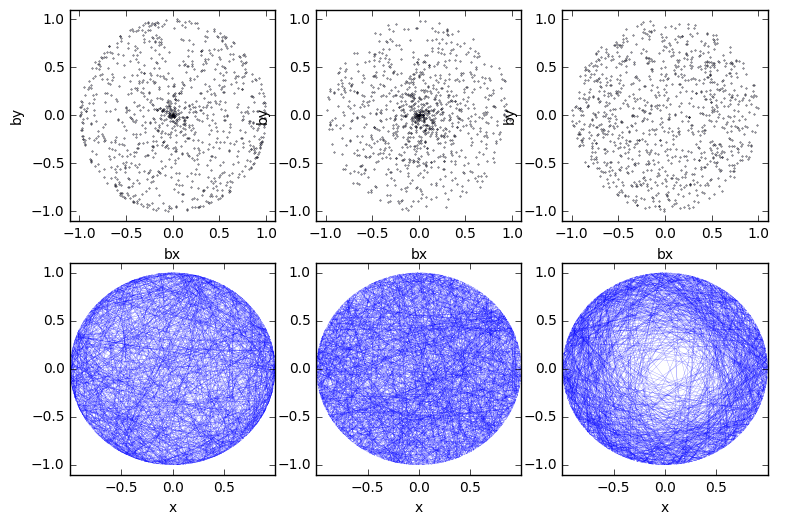

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9,6))
draw_midpoints(arg1, axes[0,0])
draw_chords(arg1, axes[1,0])
draw_midpoints(arg2, axes[0,1])
draw_chords(arg2, axes[1,1])
draw_midpoints(arg3, axes[0,2])
draw_chords(arg3, axes[1,2])

## Classical solution

If, and only if, the method of random selection is specified, does the problem have a well defined solution.

**There is no unique selection method so there cannot be a unique solution.**

## Maximum ignorance principle

### The principle

> We should not use any information that is not given in the statement of the problem.

### Application to Bertrand paradox
Bertrand's problem does not specify the size or position of the circle, therefore any objective solution must be "indifferent" to size and position. It must be scale- and position-invariant.

In that regard method 2 is the only one that is scale invariant and solution invariant (easy to see on the chord representation).

## Resource

- Wikipedia: https://en.wikipedia.org/wiki/Bertrand_paradox_(probability)
- The Well-Posed Problem: http://bayes.wustl.edu/etj/articles/well.pdf